# Import Libraries

In [12]:
# Enable inline plotting in the notebook. Comes before importing matplotlib
%matplotlib inline
# import packages
# Import pandas for data manipulation and working with dataframes
import pandas as pd
# Import numpy to perform numerical operations
import numpy as np
# Import matplotlib for creating plots and visualizations
import matplotlib.pyplot as plt
# Import seaborn for creating more advanced statistical visualizations
import seaborn as sns

from sklearn.decomposition import PCA # PCA tool

# Load Data

In [4]:
# Import Data
df = pd.read_csv('c:/LabFiles/d212-data/medical/medical_clean.csv ', index_col=0) # path to csv; change for your environment
pd.set_option("display.max_columns", None) # to display all columns
# Define the list of columns to be dropped
unused_columns = [
    # 'Lat', 'Lng', 'Children', 'Population', 'Age', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
    'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Children', 'Population',
    'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
    'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink',
    'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
    'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
    'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
    'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'
]
# Drop unused columns
df = df.drop(columns=unused_columns)

In [5]:
df.corr()

,Lat,Lng,Age,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
Lat,1.000000,-0.112348,-0.007270,-0.019369,0.001493,-0.008820,-0.010759,-0.002283
Lng,-0.112348,1.000000,0.007493,-0.006665,-0.006389,-0.009292,-0.008830,0.000079
Age,-0.007270,0.007493,1.000000,-0.012228,0.010315,0.016264,0.016876,0.716854
Income,-0.019369,-0.006665,-0.012228,1.000000,-0.013115,-0.012465,-0.014345,-0.009825
VitD_levels,0.001493,-0.006389,0.010315,-0.013115,1.000000,-0.003642,-0.001403,0.008290
Initial_days,-0.008820,-0.009292,0.016264,-0.012465,-0.003642,1.000000,0.987640,0.004409
TotalCharge,-0.010759,-0.008830,0.016876,-0.014345,-0.001403,0.987640,1.000000,0.029256
Additional_charges,-0.002283,0.000079,0.716854,-0.009825,0.008290,0.004409,0.029256,1.000000


# Normalize Data/PCA/Fit

In [6]:
# Code for Section C2 - Standardization of Data Set Variables
df_normalized = (df - df.mean())/df.std()
# PCA
pca = PCA(n_components=df.shape[1])
# Fit
pca.fit(df_normalized)
# save cleaned dataset
# export as csv
# df_normalized.to_csv(r'c:/LabFiles/d212-data/illovsky_d212_task2_cleaned_standardized_data.csv')
df_normalized.to_excel('c:/Users/pinlo/OneDrive/Desktop/WGU/d212-wgu/d212-submission/illovsky_d212_task2_cleaned_standardized_data.xlsx')


In [7]:
## print cumulative sum
print(f"cumulative sum \n {pca.explained_variance_ratio_.cumsum()} <==how much can be explained in total")
# Principal component explained variance ratio
print(f"explained_variance_ratio_ \n {pca.explained_variance_ratio_} <==how much each component contributes")

cumulative sum 
 [0.24905583 0.46324459 0.60242364 0.72896056 0.85258052 0.96308127
 0.99853535 1.        ] <==how much can be explained in total
explained_variance_ratio_ 
 [0.24905583 0.21418876 0.13917904 0.12653693 0.12361996 0.11050075
 0.03545408 0.00146465] <==how much each component contributes


In [8]:
# transform back into dataframe
pca_transformed = pd.DataFrame(pca.transform(df_normalized), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
# PCA Loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns = ['PC1', 'PC2', 'PC3', 'PC4 ', 'PC5', 'PC6', 'PC7', 'PC8'],
                        index = df_normalized.columns)
# D1 - Loadings matrix of Principal Components
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Lat,-0.013079,-0.008216,0.707443,0.010501,-0.093762,-0.700262,0.003858,0.001483
Lng,-0.010528,0.010934,-0.698601,-0.137959,-0.114966,-0.692410,-0.006681,-0.000357
Age,0.085809,0.701541,0.002471,0.017929,-0.000156,-0.003099,0.706716,0.026313
Income,-0.020516,-0.018690,-0.087846,0.725834,0.661202,-0.165777,0.002308,0.001312
VitD_levels,-0.001636,0.019146,0.059987,-0.673096,0.735289,-0.048152,-0.001932,-0.001552
Initial_days,0.701050,-0.091424,-0.000290,0.007525,0.008485,-0.014659,0.031677,-0.706274
TotalCharge,0.702184,-0.080868,-0.001272,0.005167,0.009042,-0.013262,-0.031469,0.706486
Additional_charges,0.086013,0.701455,0.012542,0.023631,0.000546,-0.000853,-0.706038,-0.036819


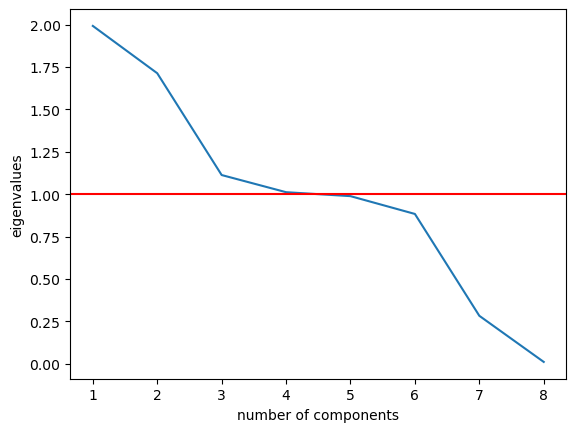

In [9]:
# D2 - Identification of the Total Number of Components
covariance_matrix = np.dot(df_normalized.T, df_normalized)/ df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca.components_]
# plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color='red')
plt.show() 

In [10]:
# D3 - Variance of each component
# captured variance per principal components
evr = pca.explained_variance_ratio_*100
var_df = pd.DataFrame(evr.round(2), columns=['Captured Variance Per PC'],
                        index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
print(var_df)

     Captured Variance Per PC
PC1                     24.91
PC2                     21.42
PC3                     13.92
PC4                     12.65
PC5                     12.36
PC6                     11.05
PC7                      3.55
PC8                      0.15


In [11]:
# D4 - Total Variance Captured by Components
# Cumulative sum formatted
cumsum = pca.explained_variance_ratio_.cumsum()*100
cumsum_df = pd.DataFrame(cumsum, columns=['Cumulative Sum'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
print(cumsum_df)
cumsum_df

     Cumulative Sum
PC1       24.905583
PC2       46.324459
PC3       60.242364
PC4       72.896056
PC5       85.258052
PC6       96.308127
PC7       99.853535
PC8      100.000000


,Cumulative Sum
PC1,24.905583
PC2,46.324459
PC3,60.242364
PC4,72.896056
PC5,85.258052
PC6,96.308127
PC7,99.853535
PC8,100.000000


In [13]:
print(loadings)

                         PC1       PC2       PC3      PC4        PC5   
Lat                -0.013079 -0.008216  0.707443  0.010501 -0.093762  \
Lng                -0.010528  0.010934 -0.698601 -0.137959 -0.114966   
Age                 0.085809  0.701541  0.002471  0.017929 -0.000156   
Income             -0.020516 -0.018690 -0.087846  0.725834  0.661202   
VitD_levels        -0.001636  0.019146  0.059987 -0.673096  0.735289   
Initial_days        0.701050 -0.091424 -0.000290  0.007525  0.008485   
TotalCharge         0.702184 -0.080868 -0.001272  0.005167  0.009042   
Additional_charges  0.086013  0.701455  0.012542  0.023631  0.000546   

                         PC6       PC7       PC8  
Lat                -0.700262  0.003858  0.001483  
Lng                -0.692410 -0.006681 -0.000357  
Age                -0.003099  0.706716  0.026313  
Income             -0.165777  0.002308  0.001312  
VitD_levels        -0.048152 -0.001932 -0.001552  
Initial_days       -0.014659  0.031677 -0.706

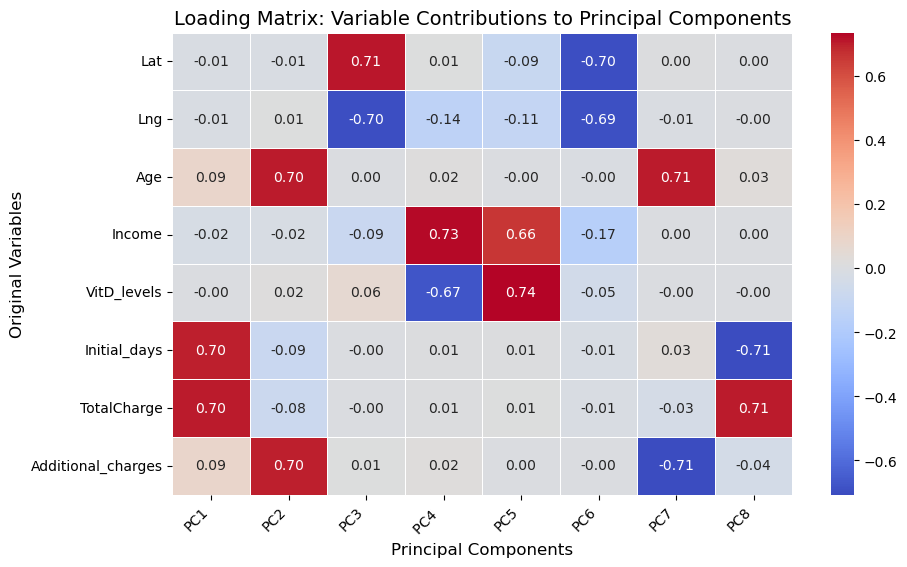

In [14]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create the heatmap
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) 

# Set chart title and labels
plt.title('Loading Matrix: Variable Contributions to Principal Components', fontsize=14)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Original Variables', fontsize=12)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the heatmap
plt.show()